## Final Project Submission

Please fill out:
* Student name:WILLIAM ONSARE MORARA
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# WE START BY REVIEWING AND GETTING TO SEE WHAT DATA IS CONTAINED IN THE (bom.movie_gross.csv)

# loading the data

In [1]:
#we start by importing various packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#for easy memorability we will refer to the data as project_data
project_data = pd.read_csv("bom.movie_gross.csv")


# DATA INSIGHTS

In [3]:
#we will start by having a look at what type of data we have
project_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#let us know the type of data and how to treat the data
type(project_data)

pandas.core.frame.DataFrame

In [5]:
#let us confirm the number of rows and columns
project_data.shape

(3387, 5)

In [6]:
#let us have alook at the full data
project_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
#now let us see what our data is about and how many values it has
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
project_data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# now let us check the data quality.
we have seen from above that some columns have missing values

In [9]:
#using a boolean test to know number of missing values in each columns
project_data.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
#we can get the percentage of missing values so we could see the effect they have
percentage = np.round((project_data.isnull().sum()/len(project_data)),4).sort_values()
percentage

title             0.0000
year              0.0000
studio            0.0015
domestic_gross    0.0083
foreign_gross     0.3986
dtype: float64

In [11]:
#let us check for duplicates
project_data.duplicated().value_counts()

False    3387
dtype: int64

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


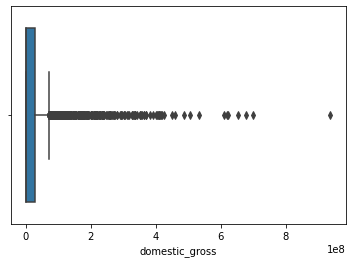

In [12]:
sns.boxplot(project_data["domestic_gross"]);

# DATA CLEANING

In [40]:
project_data.drop("foreign_gross",axis = 1, inplace=True )

In [48]:
project_data.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [45]:
project_data['domestic_gross'].fillna(project_data['domestic_gross'].mean(), inplace = True)

In [47]:
project_data['studio'].fillna(project_data['studio'].mode()[0], inplace = True)

# im.db dataset SQL

In [13]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("im.db")

In [14]:
wilsq = pd.read_sql("""SELECT *
FROM movie_basics"""
            ,conn)
wilsq

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [15]:
wilsq.shape

(146144, 6)

In [16]:
wilsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
 pd.read_sql("""SELECT *
FROM movie_ratings"""
            ,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [18]:
joined_sql_table = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
""", conn)

In [19]:
joined_sql_table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [20]:
pd.read_sql("""SELECT 
genres, COUNT(*)
FROM movie_basics
GROUP BY genres
ORDER BY COUNT(*) DESC;""", conn).head(15)

,genres,COUNT(*)
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
5,"Comedy,Drama",3519
6,Thriller,3046
7,Action,2219
8,"Biography,Documentary",2115
9,"Drama,Romance",2079


In [21]:
pd.read_sql("""SELECT genres,start_year
FROM movie_basics
WHERE genres IS NULL;""", conn)

,genres,start_year
0,None,2011
1,None,2018
2,None,2012
3,None,2010
4,None,2011
...,...,...
5403,None,2016
5404,None,2016
5405,None,2013
5406,None,2019


In [22]:
joined_sql_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [23]:
joined_sql_table.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [24]:
joined_sql_table.duplicated().sum()

0

In [25]:
joined_sql_table["genres"].value_counts()

Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Documentary,History,Musical        1
History,Romance,Western            1
Action,Mystery,Western             1
History,Romance,War                1
Comedy,News                        1
Name: genres, Length: 923, dtype: int64

In [26]:

joined_sql_table['genres'].fillna(joined_sql_table['genres'].mode()[0], inplace = True)

In [49]:
joined_sql_table.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [28]:
joined_sql_table['runtime_minutes'].fillna(joined_sql_table['runtime_minutes'].mean(), inplace = True)

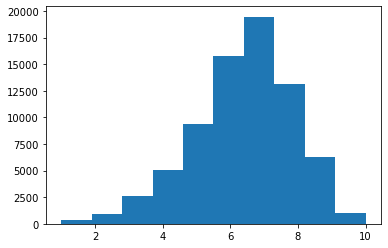

In [29]:
plt.hist(joined_sql_table['averagerating'],bins = 10);

# BUDGETS DATA

In [72]:
budgets_data = pd.read_csv("tn.movie_budgets.csv")

In [73]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [74]:
budgets_data[["domestic_gross", "production_budget", "worldwide_gross"]] = budgets_data[["domestic_gross", "production_budget", "worldwide_gross"]].apply(lambda x: x.str.replace('$', '').str.replace(',', '').astype(float))


In [75]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


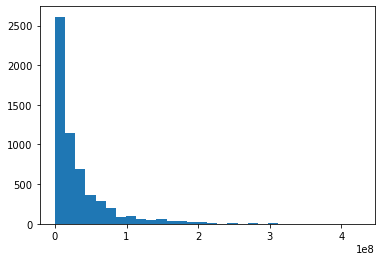

In [76]:
plt.hist(budgets_data['production_budget'], bins = 30);

In [83]:
budgets_data["production_budget"].corr(budgets_data['domestic_gross'])


0.6856818396752741

# TMDB

In [68]:
tmdb_data = pd.read_csv('tmdb.movies.csv',index_col = 0)
tmdb_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [69]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [70]:
tmdb_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [66]:
tmdb_data.drop_duplicates(keep = 'first',inplace = True)

In [67]:
tmdb_data.duplicated().value_counts()

False    25497
dtype: int64